In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('master.csv')

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
df.shape

(27820, 12)

In [ ]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
print("Data Types: \n", df.dtypes.value_counts())

Data Types: 
 object     6
int64      4
float64    2
dtype: int64


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
df.describe(include="O")

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Iceland,female,35-54 years,Bahamas1996,"308,416,982,140",Generation X
freq,382,13910,4642,12,12,6408


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,False,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df["HDI for year"].fillna( method ='bfill', inplace = True)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.619,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.619,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.619,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, HDI for year,  gdp_for_year ($) , gdp_per_capita ($), generation]
Index: []


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                       13.000
suicides_no               128.000
population            1388644.750
suicides/100k pop          15.700
HDI for year                0.145
gdp_per_capita ($)      21427.000
dtype: float64


In [ ]:
df_out = df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(20086, 12)

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation']


# Understanding the data

In [ ]:
df.drop(['country-year', 'HDI for year'], inplace=True, axis = 1)

In [ ]:
df = df.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'})

GDP is the GDP of the country in question. In this case, the 'gdp_for_year' field is like a string, so let's convert this to a number.

In [ ]:
for i, x in enumerate(df['gdp_for_year']):
    df['gdp_for_year'][i] = x.replace(',', '')
    
df['gdp_for_year'] = df['gdp_for_year'].astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Possible age ranges and generations are:

In [ ]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

# Adding some things

In [ ]:
Frist_world = ['United States', 'Germany', 'Japan', 'Turkey', 'United Kingdom', 'France', 'Italy', 'South Korea',
              'Spain', 'Canada', 'Australia', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 
              'Sweden', 'Austria', 'Switzerland', 'Israel', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Ireland',
              'New Zeland', 'Slovenia', 'Estonia', 'Cyprus', 'Luxembourg', 'Iceland']

Second_world = ['Russian Federation', 'Ukraine', 'Poland', 'Uzbekistan', 'Romania', 'Kazakhstan', 'Azerbaijan', 'Czech Republic',
               'Hungary', 'Belarus', 'Tajikistan', 'Serbia', 'Bulgaria', 'Slovakia', 'Croatia', 'Maldova', 'Georgia',
               'Bosnia And Herzegovina', 'Albania', 'Armenia', 'Lithuania', 'Latvia', 'Brazil', 'Chile', 'Argentina',
               'China', 'India', 'Bolivia', 'Romenia']

In [ ]:
country_world = []
for i in range(len(df)):
    
    if df['country'][i] in Frist_world:
        country_world.append(1)
    elif df['country'][i] in Second_world:
        country_world.append(2)
    else:
        country_world.append(3)

df['country_world'] = country_world

# Exploratory analysis

analyze the impact of some attributes in isolation on the number of suicides. Let's start with the year.

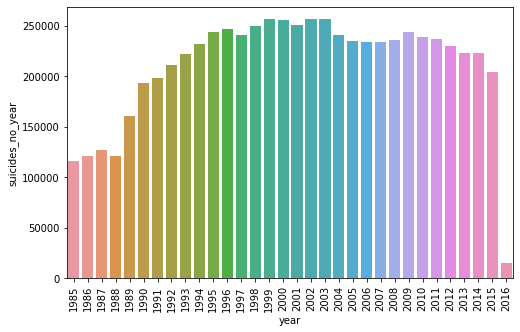

In [ ]:
suicides_no_year = []

for y in df['year'].unique():
    suicides_no_year.append(sum(df[df['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = df['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

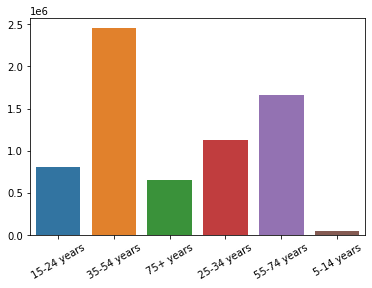

In [ ]:
suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_no_age)

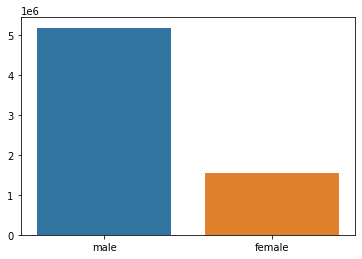

In [ ]:
suicides_no_sex = []

for s in df['sex'].unique():
    suicides_no_sex.append(sum(df[df['sex'] == s]['suicides_no']))

sns.barplot(x = df['sex'].unique(), y = suicides_no_sex)

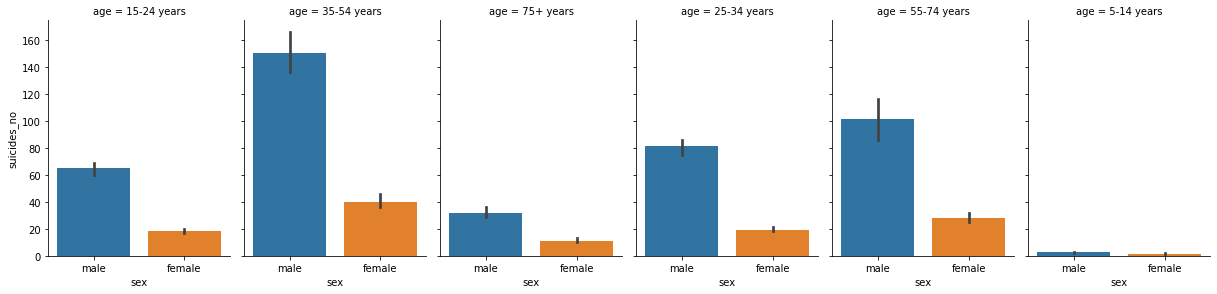

In [ ]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df, estimator=np.median,height=4, aspect=.7,kind='bar')

men commit suicide considerably more than women, even before the age of 14.

Countries with a larger population are expected to have more suicides.

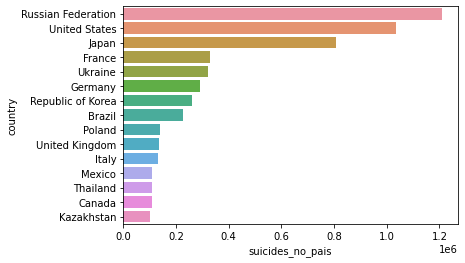

In [ ]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides_no']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

By using the amount of suicides per 100k inhabitants, we remove the bias of overpopulated countries.

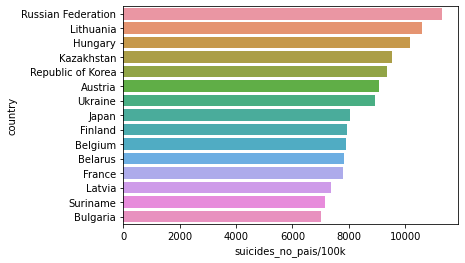

In [ ]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides/100k pop']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais/100k'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['suicides_no_pais/100k'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

Generation

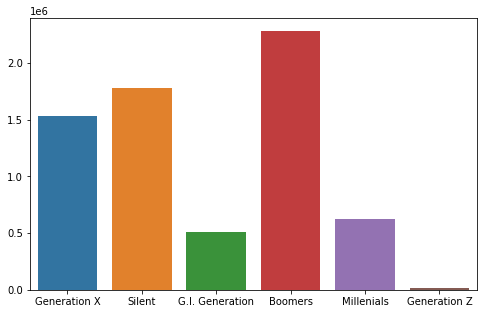

In [ ]:
suicides_no_gen = []
for g in df['generation'].unique():
    suicides_no_gen.append(sum(df[df['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sns.barplot(x = df['generation'].unique(), y = suicides_no_gen)

Country-world

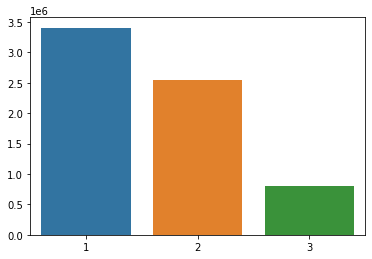

In [ ]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides_no']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

More developed countries have a higher suicide rate. This can be justified by various theories, such as excessive work, religious issues, rates of psychiatric illness, etc.

GDP of the year

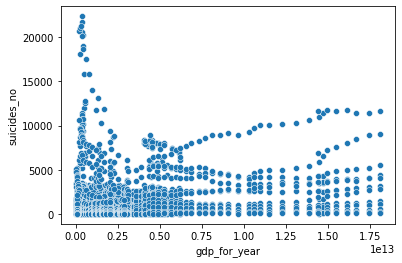

In [ ]:
sns.scatterplot(x = 'gdp_for_year', y = 'suicides_no', data = df)


GDP per capita

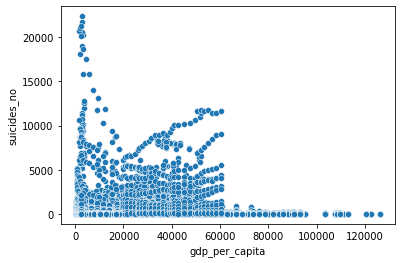

In [ ]:
sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', data = df)

Apparently, in impoverished places, there is much suicide. As income increases, suicide decreases together. However, from a point (~ 20k), suicide tends to increase again. Apparently, the data shows some flaws in the 60k range.


# Correlation of attributes

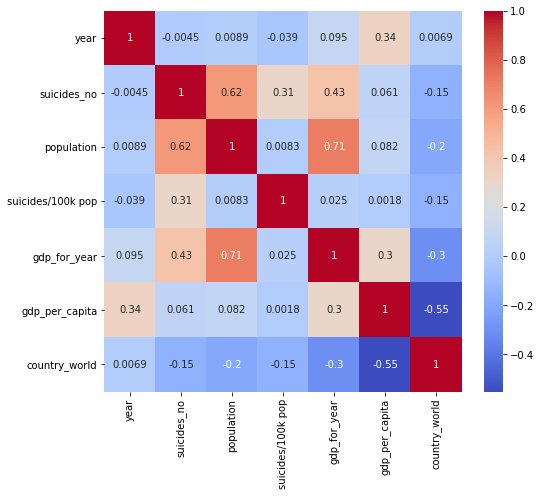

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)


The highest correlations are between population and GDP since rich countries, in general, are more populous. Also, between the number of suicides and the population, if there are more people, then more suicides. The correlation between GDP per capita and the world of the country occurs negatively since the first world countries have a higher income, and third world, lower income.

Univariate numerical columns

In [ ]:
unique_country = list(df.country.unique())
x_plot = df[df['sex'] == 'male']
x_plot = x_plot[x_plot['age'] == '15-24 years']
x_plot = x_plot[x_plot['country'] == 'Albania']
x_plot = x_plot.drop('HDI for year',axis = 1)
x_plot
y_plot = df[df['sex'] == 'female']
y_plot = y_plot[y_plot['age'] == '15-24 years']
y_plot = y_plot[y_plot['country'] == 'Albania']

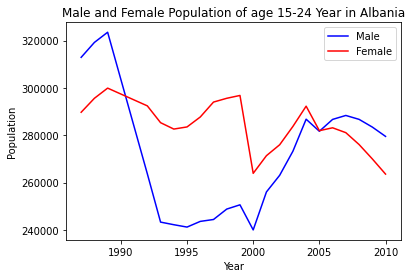

In [ ]:
plt.plot(x_plot.year,x_plot.population,'blue')
plt.plot(y_plot.year,y_plot.population,'red')
plt.xlabel('Year')
plt.legend(['Male','Female'])
plt.ylabel('Population')
plt.title('Male and Female Population of age 15-24 Year in Albania')
plt.show()

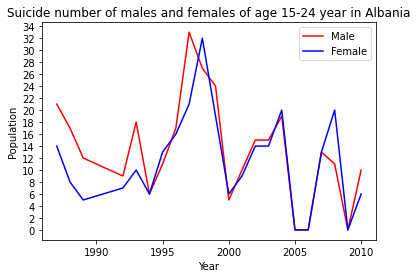

In [ ]:
plt.plot(x_plot.year,x_plot.suicides_no,'red')
plt.plot(y_plot.year,y_plot.suicides_no,'blue')
plt.xlabel('Year')
plt.legend(['Male','Female'])
plt.yticks(np.arange(0,35,2))
plt.ylabel('Population')
plt.title('Suicide number of males and females of age 15-24 year in Albania')
plt.show()

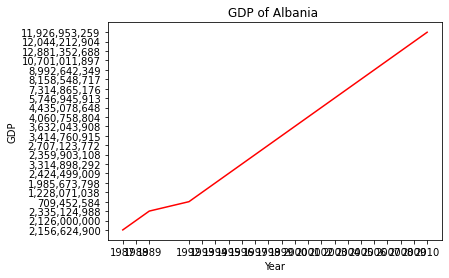

In [ ]:
# x_plot.sort_values(' gdp_for_year ($) ')
plt.plot(x_plot.year,x_plot[' gdp_for_year ($) '],'red')
plt.xlabel('Year')
# plt.xlim(1985,2015)
plt.xticks(x_plot.year.unique())
plt.ylabel('GDP')
plt.title('GDP of Albania ')
plt.show()

# Scatter Matrix

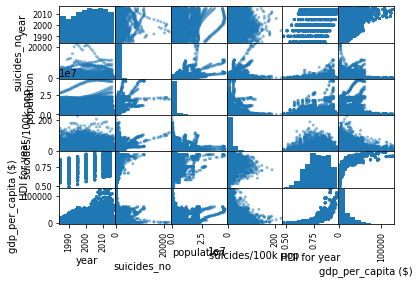

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

# Skewness

In [ ]:
df['population'].skew()

4.459414421535874

In [ ]:
population_log=np.log(df['population'])
population_log

0        12.653639
1        12.637855
2        12.576601
3         9.989665
4        12.521978
           ...    
27815    15.102215
27816    12.761293
27817    14.831523
27818    14.783103
27819    14.179414
Name: population, Length: 27820, dtype: float64

# Linear Regression

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from scipy.optimize import curve_fit


  Linear Regression 

Intercepts:  2001.2302356009359
Coefficients:  [-4.96731913e-05]
Mean squared error: 72.06


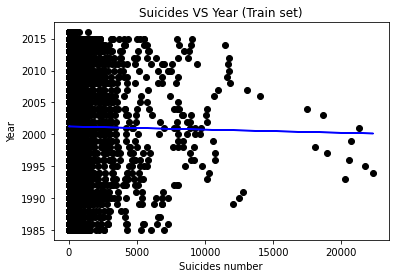

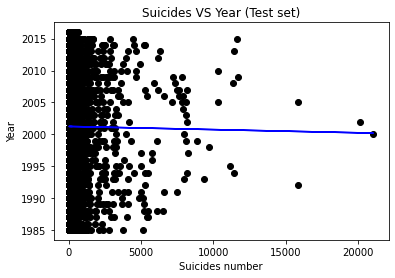

In [4]:
data = df[["suicides_no","year"]] 

Y = data.year
X = data.drop(columns=['year'])


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )


# Fitting Simple Linear Regression to the Training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_test_pred = model.predict(X_test)
print("\n  Linear Regression \n")

# Predicting the Train set results - Just for comparasion
y_train_pred = model.predict(X_train)


print('Intercepts: ', model.intercept_)
print('Coefficients: ', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))

# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='black')
viz_train.plot(X_train, y_train_pred, color='blue')
viz_train.title('Suicides VS Year (Train set)')
viz_train.xlabel('Suicides number')
viz_train.ylabel('Year')
viz_train.show()# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='black')
viz_test.plot(X_test,y_test_pred, color='blue')
viz_test.title('Suicides VS Year (Test set)')
viz_test.xlabel('Suicides number')
viz_test.ylabel('Year')
viz_test.show() 

# Multiple Linear Regression


 Multiple Linear Regression 

Intercepts:  1765.62059617709
Coefficients:  [-0.7579492]
Mean squared error: 612308.13
Score for suicides number :  -0.0007832293429406167


Text(0.5, 1.0, 'Plot for Price - Train:Blue and Test:Red')

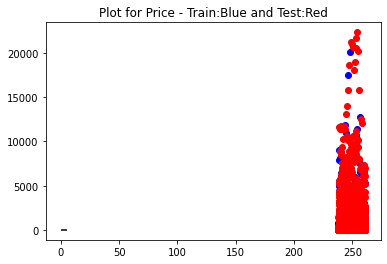

In [5]:
#======================== Multiple Linear Regression =========================
y = data.suicides_no
X = data.drop(columns=['suicides_no'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )


modelprice = LinearRegression()

modelprice.fit(X_train, y_train)

y_pred = modelprice.predict(X_test)

print("\n Multiple Linear Regression \n")


print('Intercepts: ', modelprice.intercept_)
print('Coefficients: ', modelprice.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


score = modelprice.score(X_test, y_test)
print("Score for suicides number : ", score)

plt.scatter(y_pred,y_test,c='b')
plt.scatter(modelprice.predict(X_train),y_train,c='r')


plt.hlines(y=0,xmin=0,xmax=5)
plt.title('Plot for Price - Train:Blue and Test:Red')

# Normalisation and Logistic regression for the prediction

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
features=['suicides_no','year']
x=df[features]

In [8]:
y=df['gdp_per_capita ($)']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.model_selection import train_test_split
#we splitted the dataset into train and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
#we used standard scalar for better results
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [13]:
#apply logistic regression for the prediction 
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
x_test = scaler.transform(x_test)

In [15]:
y_pred = model.predict(x_test)

In [17]:
#The train accuracy
model.score(x_train, y_train)

0.003902639416658108

In [18]:
#The confusion matrix for the model

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


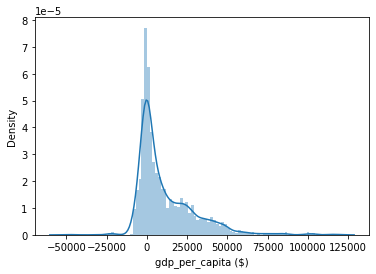

In [19]:
sns.distplot((y_test - y_pred),bins = 100)

# Decision Tree

In [20]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  

  
# Function to split the dataset 
def splitdataset(df): 
  features=['suicides_no','year','age']
  X=df[features]
  y=df['gdp_per_capita ($)']
  return X, y, X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

      
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.0016774502755811168

# KNN

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) #n_neighbor is k
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
knn.score(X_test,y_test)

0.011023244668104481

# Random Forest

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=1)   # 200 sub sample
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.002156721782890007

# Naive Bayes

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1)

from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.0017972681524083393